In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
file_path = './NATOPS_sid_TRAIN.csv'  
natops_data = pd.read_csv(file_path)

# 1. Find clusters

In [5]:
data_for_clustering = natops_data.drop(['isTest', 'sid', 'class'], axis=1)

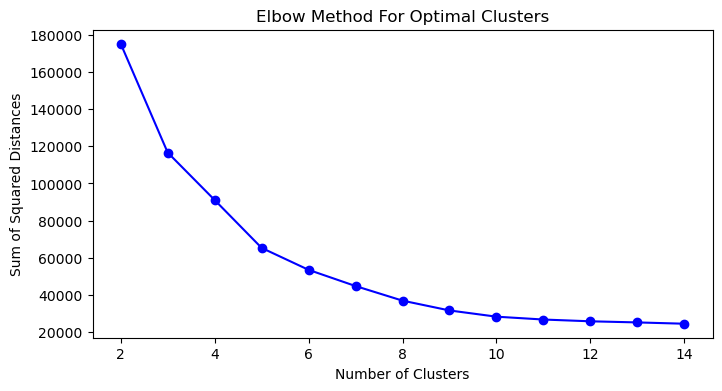

In [11]:
# Elbow Method: Determine the optimal number of clusters
range_clusters = range(2, 15)
elbow_method_results = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(data_for_clustering)
    elbow_method_results.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, elbow_method_results, 'bo-')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [17]:
# According to the plot above, the errors converge at cluster = 10 
# Applying k-Means clustering
n_clusters = 10  
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
natops_data['cluster'] = kmeans.fit_predict(natops_data.drop(['isTest', 'sid', 'class'], axis=1))

# 2. Generate atomic units data:

In [24]:
cluster_counts = natops_data.groupby(['sid', 'cluster']).size().unstack(fill_value=0)
cluster_ratios = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)
cluster_ratios.reset_index(inplace=True)
cluster_ratios.columns = ['sid'] + [f'cluster_{i+1}_ratio' for i in cluster_ratios.columns[1:]]

In [25]:
merged_data = natops_data.merge(cluster_ratios, on='sid')

In [26]:
columns_to_drop = ['fea' + str(i) for i in range(1, 25)]
merged_data.drop(columns_to_drop, axis=1, inplace=True)

In [27]:
merged_data

,isTest,sid,class,cluster,cluster_1_ratio,cluster_2_ratio,cluster_3_ratio,cluster_4_ratio,cluster_5_ratio,cluster_6_ratio,cluster_7_ratio,cluster_8_ratio,cluster_9_ratio,cluster_10_ratio
0,0,1,3,4,0.0,0.0,0.078431,0.000000,0.392157,0.196078,0.000000,0.254902,0.0,0.078431
1,0,1,3,4,0.0,0.0,0.078431,0.000000,0.392157,0.196078,0.000000,0.254902,0.0,0.078431
2,0,1,3,4,0.0,0.0,0.078431,0.000000,0.392157,0.196078,0.000000,0.254902,0.0,0.078431
3,0,1,3,4,0.0,0.0,0.078431,0.000000,0.392157,0.196078,0.000000,0.254902,0.0,0.078431
4,0,1,3,4,0.0,0.0,0.078431,0.000000,0.392157,0.196078,0.000000,0.254902,0.0,0.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18355,1,360,3,6,0.0,0.0,0.137255,0.019608,0.176471,0.254902,0.078431,0.156863,0.0,0.176471
18356,1,360,3,4,0.0,0.0,0.137255,0.019608,0.176471,0.254902,0.078431,0.156863,0.0,0.176471
18357,1,360,3,6,0.0,0.0,0.137255,0.019608,0.176471,0.254902,0.078431,0.156863,0.0,0.176471
18358,1,360,3,4,0.0,0.0,0.137255,0.019608,0.176471,0.254902,0.078431,0.156863,0.0,0.176471


In [28]:
merged_data.to_csv('merged_data_phase2.csv', index=False)

In [29]:
merged_data.head()

,isTest,sid,class,cluster,cluster_1_ratio,cluster_2_ratio,cluster_3_ratio,cluster_4_ratio,cluster_5_ratio,cluster_6_ratio,cluster_7_ratio,cluster_8_ratio,cluster_9_ratio,cluster_10_ratio
0,0,1,3,4,0.0,0.0,0.078431,0.0,0.392157,0.196078,0.0,0.254902,0.0,0.078431
1,0,1,3,4,0.0,0.0,0.078431,0.0,0.392157,0.196078,0.0,0.254902,0.0,0.078431
2,0,1,3,4,0.0,0.0,0.078431,0.0,0.392157,0.196078,0.0,0.254902,0.0,0.078431
3,0,1,3,4,0.0,0.0,0.078431,0.0,0.392157,0.196078,0.0,0.254902,0.0,0.078431
4,0,1,3,4,0.0,0.0,0.078431,0.0,0.392157,0.196078,0.0,0.254902,0.0,0.078431
